In [1]:
import numpy as np
import scipy as sp
from scipy import fftpack
import cv2

In [2]:
from matplotlib import pyplot as plt
from matplotlib import colors

In [3]:
def dost_bw(l):
    out = np.zeros(int(2*np.log2(l)))
    l1 = np.arange(np.log2(l)-2,-1,-1)
    l2 = np.arange(0,np.log2(l)-1)
    out[1:int(1+np.log2(l)-1)]=l1
    out[-int(np.log2(l)-1):]=l2
    
    out = np.exp2(out).astype(np.int16)
    return out
    

In [4]:
bw = dost_bw(16)
print(bw)

[1 4 2 1 1 1 2 4]


In [173]:
ns = 2**10
t = np.linspace(0,1,ns)
f = np.linspace(-ns/2,ns/2 -1 ,ns)
inp = np.exp(2 *np.pi* 1j*(ns/2**2)*t)*((0/8<=t)&(t<1/8))+ \
     np.exp(2 *np.pi* 1j*(ns/2**3)*t)*((1/8<=t)&(t<2/8))+ \
     np.exp(2 *np.pi* 1j*(ns/2**4)*t)*((2/8<=t)&(t<3/8))+ \
     np.exp(2 *np.pi* 1j*(ns/2**5)*t)*((3/8<=t)&(t<4/8))+ \
     np.exp(2 *np.pi* 1j*(ns/2**6)*t)*((4/8<=t)&(t<5/8))+ \
     np.exp(2 *np.pi* 1j*(-ns/2**2)*t)*((5/8<=t)&(t<6/8))+ \
     np.exp(2 *np.pi* 1j*(-ns/2**3)*t)*((6/8<=t)&(t<7/8))+ \
     np.exp(2 *np.pi* 1j*(-ns/2**4)*t)*((7/8<=t)&(t<8/8))

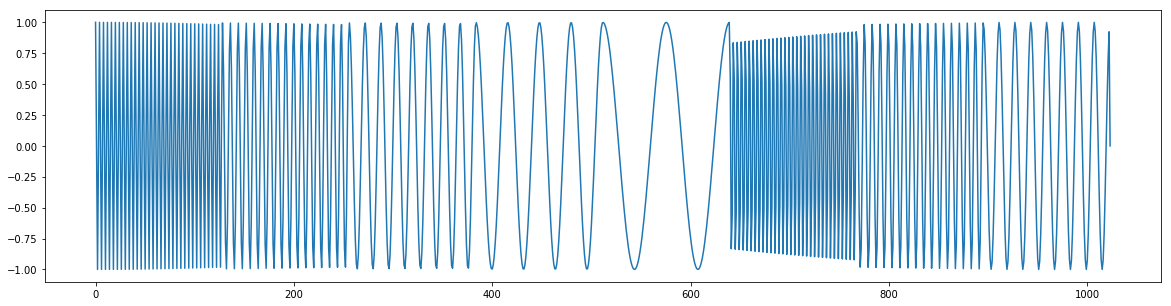

In [177]:
plt.figure(figsize = (20,5))
plt.plot(inp)

In [107]:
inp = np.sin(t)
plt.plot(inp)

In [4]:
def dost(inp):
    l = inp.shape[0]
    fft_inp = fftpack.fftshift(fftpack.fft(fftpack.ifftshift(inp,axes=0),axis=0),axes=0)
    #plt.figure(figsize = (30,5))
    #ax = np.linspace(-512,511,2**10)
    #plt.plot(ax,fft_inp[0,:])
    bw_inp = dost_bw(l)
#     print(bw_inp)
    k = 0
    dost_inp = np.zeros_like(fft_inp)

    for r in bw_inp:
        if(r==1):
            dost_inp[k,:] = fft_inp[k,:]
            k = k+r
        else:
            dost_inp[k:r+k,:] = fftpack.fftshift(fftpack.ifft(fftpack.ifftshift(fft_inp[k:r+k,:],axes=0),axis=0),axes=0)
            k = k+r

#     plt.plot(fft_inp)
    #plt.figure(figsize = (20,5))
    #plt.plot(np.abs(dost_inp[0,:]))
    
    
    return dost_inp
    

In [36]:
def time_freq(inp):
    dost_inp = dost(inp[:,np.newaxis])
    D = dost_inp.shape[0]
    bw_inp = dost_bw(D)
    tbw = D/bw_inp
    tfr = np.zeros((D,D))
    print(tfr.shape)
    # print(tbw)
    count = 0

    for hh in np.arange(len(bw_inp)):
        for kk in np.arange(bw_inp[hh]):
            ii = D - np.sum(bw_inp[:hh+1])
            jj = int(tbw[hh]*kk)

            tmp = np.repeat(np.repeat(np.array([[count]]),bw_inp[hh],axis=0),tbw[hh],axis=1)
    #         print(tmp."shape)
    #         print(ii,(ii+tmp.shape[0]),jj,(jj+tmp.shape[1]))
    #         print(tfr[ii:(ii+tmp.shape[0]),jj:(jj+tmp.shape[1])].shape)
            tfr[ii:(ii+tmp.shape[0]),jj:(jj+tmp.shape[1])] = tmp
            count += 1

    tfr = tfr.astype(np.int32)
    print(tfr.shape,dost_inp.shape)
#     print(dost_inp.shape)
    tfr = dost_inp[tfr,:]
    print(tfr.shape)
#     plt.figure(figsize=(30,8))
    plt.imshow(np.log(np.abs(tfr[:,:,0])),extent=[0,255,-128,127]) 
    plt.colorbar()
    plt.xlabel("Spectral Bands")
    plt.ylabel("Frequency")
    plt.show()
    plt.savefig('../images/spectrum_dost.png')

#     print(tfr.astype(np.int32))
    return 1#tfr


In [24]:
def fourier(mat):
    return fftpack.fftshift(fftpack.fft(fftpack.ifftshift(mat,axes=1),axis=1),axes=1)/np.sqrt(mat.shape[1])

def fourier2d(mat):
    return fourier(fourier(mat).T).T


In [25]:
# # dost_out = dost(inp[np.newaxis,:])
# # plt.figure(figsize=(30,8))
# # plt.plot(np.abs(dost_out[0,:]))
# # dost_out.shape
# # ip = np.array(np.arange(16))+1
# # print(ip[np.newaxis,:].shape)
# tfr = time_freq(inp)

# # print(ip[tfr])
# # plt.plot(fftpack.fftshift(fftpack.fft(fftpack.ifftshift(ip))))
# #plt.figure(figsize=(30,8))
# #plt.imshow(np.abs(tfr[0,:,:]))    

In [ ]:
plt.scatter

In [ ]:
!wget "https://raw.githubusercontent.com/hideack/phash-study/master/samples/lena.jpg"

In [31]:
# img = cv2.imread("lena.jpg",0)
# #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img,'gray')

In [30]:
# ans = fourier2d(img)
# ans = colors.Normalize(ans)
# #plt.imshow(np.abs(np.log(ans)),norm=plt.colors.Normalize.autoscale)

In [29]:
# res = dost(dost(img).T).T
# abs_img = np.abs(res)
# print(abs_img)

In [27]:
# abs_res = np.abs(res)
# plt.figure(figsize=(10,10))
# plt.imshow(np.log(0.00001+abs_res),'gray')

In [28]:
# print(np.transpose(res))

In [7]:
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [8]:
def load_data():
    print("Loading Data...")
    img = sp.io.loadmat("../../Datasets/Indian_pines_corrected.mat")
#     print(img.keys())
    img = img['indian_pines_corrected']
    groundT = sp.io.loadmat("../../Datasets/Indian_pines_gt.mat")
    groundT = groundT["indian_pines_gt"]
#     print(groundT.keys())
    print("Data Loaded Successfully")
    return img,groundT
def split_dataset(img,groundT):
    print("Splitting Dataset")
    imgr = img.reshape([-1,img.shape[2]],order='F')
#     groundIndexes = groundT[:,0]-1
    groundLabels = groundT.flatten(order='F')
    imgr = normalize(imgr.astype(np.float32),axis=1)
#     trainData,testData,trainLabels,testLabels = train_test_split \
#                 (imgr,groundLabels,test_size=0.9,random_state=29)
    trIdx = np.zeros((600*10))
    for i in range(10):
        tmp = np.where(groundLabels==i)
        tmp = tmp[0]
        np.random.shuffle(tmp)
        trIdx[(600*(i)):(600*(i+1))] = tmp[:600]
    trIdx = trIdx.astype(np.int32)
    
    
    np.random.shuffle(trIdx)
    
    trainData = imgr[trIdx]
    trainLabels = groundLabels[trIdx]
    
#    trainData = normalize(np.array(trainData,dtype=np.float64),axis=1)
    print("Split Successful")
    return (imgr,groundLabels,trainData,trainLabels)
    
#%%
img,groundT = load_data()
# data,grLabels,trData,trLabels = split_dataset(img,groundT)

Loading Data...
Data Loaded Successfully


In [9]:
imgr = img.reshape((-1,200))

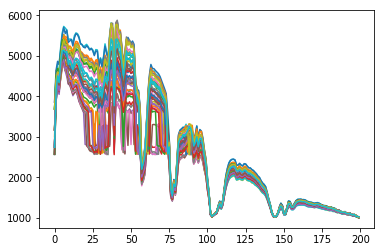

In [13]:
for i in range(110,150):
    plt.plot(imgr[i,:]);
plt.show()

In [10]:
dost_ = np.zeros((imgr.shape[0],256))
dost_[:,:200] = imgr

In [30]:
dost_data = dost(ext_data.T).T
dost_trData = dost(ext_trdata.T).T

In [33]:
data_d = np.abs(dost_data)
trData_d = np.abs(dost_trData)

In [14]:
plt.figure(figsize=(30,8))
for i in range(50):
    plt.plot(np.abs(trData[np.where(trLabels==9)[0][i]]))

NameError: name 'trData' is not defined

<Figure size 2160x576 with 0 Axes>

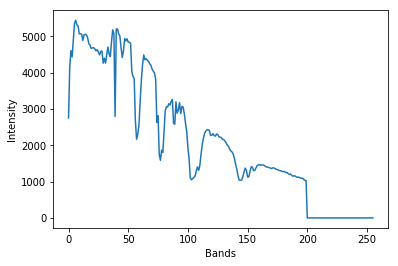

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(dost_[100,:]);
plt.xlabel('Bands')
plt.ylabel('Intensity')
plt.show()
plt.savefig('../images/spectrum.png')

(256, 256)
(256, 256) (256, 1)
(256, 256, 1)


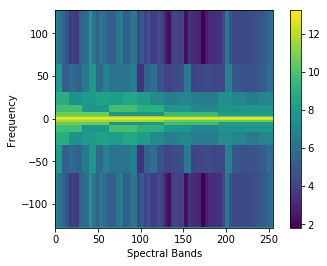

1

<Figure size 432x288 with 0 Axes>

In [37]:
time_freq(dost_[100,:])

In [12]:
from sklearn import svm

In [13]:
svm1  = svm.SVC(C=1.5)
svm1.fit(trData,trLabels)

SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
predictions = svm1.predict(trData)

In [15]:
trLabels

array([7, 7, 3, ..., 3, 1, 4], dtype=uint8)

In [16]:
predictions

array([7, 7, 3, ..., 3, 7, 4], dtype=uint8)

In [17]:
np.sum(trLabels==predictions)/len(trLabels)

0.5511666666666667

In [120]:
max(predictions)

9

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Conv1D,MaxPooling1D,Dense,Dropout,Flatten,LSTM,Reshape,Input,Conv2D,MaxPooling2D
from keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
from scipy import io
from sklearn.preprocessing import normalize

In [34]:
oh_trLabels = to_categorical(trLabels)

In [37]:
inpL = Input((128,))

fc = Dense(128,activation='relu')(inpL)
fc = Dropout(0.4)(fc)

fc = Dense(256,activation='relu')(fc)
fc = Dropout(0.4)(fc)

fc = Dense(10,activation='softmax')(fc)

model = Model(inputs=(inpL),outputs=(fc))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 52,106
Trainable params: 52,106
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
# history = model.fit(x=trData_d,y=oh_trLabels,validation_split=0.1,batch_size=16,epochs=50)

In [39]:
oh_grLabels = to_categorical(grLabels)

In [28]:
# model.evaluate(data_d,oh_grLabels,batch_size=16)